<a href="https://colab.research.google.com/github/ltbatista/computer-vision/blob/master/Building_a_CNN_for_handwritten_digits_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN in KERAS 
### Creating a model based on the MNIST Dataset of Handwritten Digits

### Step 1: Loading dataset

In [3]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)


### Step 2A: Examine the size and image dimensions
- Check the number of samples, dimensions and wheter images are color or grayscale
- We see that our training data consist of **60,000** samples of training data, **10,000** sampes of test data
- Our labels are appropriately sized as well
- Our image dimensions are **28 x 28**, with no color channels (i.e. they are grayscale, so no BGR channels)


In [4]:
# printing the number of samples in X_train, X_test, y_train, y_test
print("Initial shape of dimensions of X_train", str(X_train.shape))

print("Number of samples in our training data: "+ str(len(X_train)))
print("Number of labels in out training data: "+ str(len(y_train)))
print("Number of samples in our test data: "+ str(len(X_test)))
print("Number of labels in out test data: "+ str(len(y_test)))
print()
print("Dimensions of x_train:" + str(X_train[0].shape))
print("Labels in x_train:" + str(y_train.shape))
print()
print("Dimensions of X_test:" + str(X_test[0].shape))
print("Labels in X_test:" + str(y_test.shape))

Initial shape of dimensions of X_train (60000, 28, 28)
Number of samples in our training data: 60000
Number of labels in out training data: 60000
Number of samples in our test data: 10000
Number of labels in out test data: 10000

Dimensions of x_train:(28, 28)
Labels in x_train:(60000,)

Dimensions of X_test:(28, 28)
Labels in X_test:(10000,)


### Step 2B - Let's take a look at some of images in this dataset
- Using OpenCV
- Using Matplotlib

In [5]:
# using OpenCV
import cv2
from google.colab.patches import cv2_imshow # this is because I use Colab Research by Google
import numpy as np

for i in range(0,6):
  random_num = np.random.randint(0, len(X_train))
  img = X_train[random_num]
  cv2_imshow(img)
  cv2.waitKey(0)

cv2.destroyAllWindows()

** Let's do the same thing byt using matplotlib to plot 6 images**


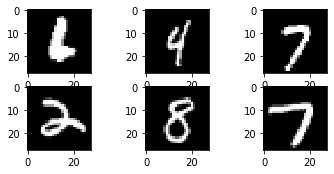

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(331)
random_num = np.random.randint(0,len(X_train))
plt.imshow(X_train[random_num], cmap=plt.get_cmap('gray'))


plt.subplot(332)
random_num = np.random.randint(0,len(X_train))
plt.imshow(X_train[random_num], cmap=plt.get_cmap('gray'))


plt.subplot(333)
random_num = np.random.randint(0,len(X_train))
plt.imshow(X_train[random_num], cmap=plt.get_cmap('gray'))


plt.subplot(334)
random_num = np.random.randint(0,len(X_train))
plt.imshow(X_train[random_num], cmap=plt.get_cmap('gray'))


plt.subplot(335)
random_num = np.random.randint(0,len(X_train))
plt.imshow(X_train[random_num], cmap=plt.get_cmap('gray'))


plt.subplot(336)
random_num = np.random.randint(0,len(X_train))
plt.imshow(X_train[random_num], cmap=plt.get_cmap('gray'))

plt.show()

### Step 3A - Prepare our dataset for training

In [7]:
# storing the number of rows and col
img_rows = X_train[0].shape[0]
img_cols = X_train[0].shape[1]

# Getting our data in the right 'shape' needed for Keras
# We need to add a 4th dimension to our date thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

# store the shape of a single image
input_shape = (img_rows, img_cols, 1)

# change out image type to float32 data type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize out data by change the range from (0 to 255) to (0 to 1)
X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Step 3B - One Hot Encode Our Labels (Y)

In [8]:
from keras.utils import np_utils

# Now we one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test  = np_utils.to_categorical(y_test)

# Let's count the number columns in our hot encoded matrix
print('Number of classes: ' + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = X_train.shape[1] * X_train.shape[2]


Number of classes: 10


### Step 4 - Create Our Model
- We're constructing a simple but effective CNN that uses 32 filters of size 3x3
- We've added a 2nd CONV layer of 64 filters of the same size 3x2
- We then downsample out data to 2x2, hete he apply a dropout where p is set to 0.25
- We then flatten out Max Pool output that is connected to a Dense/FC layer has an output size of 128
- How we apply a dropout where P is set to 0.5
- Thus 128 output is connected to another FC/Dense layer that outputs to the 10 categorical units

In [9]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD

model = Sequential()

model.add(Conv2D(32, (3,3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, 
                 (3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
             optimizer = SGD(0.01),
             metrics = ['accuracy'])

print(model.summary())







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776  

### Step 5 - Train our Model
- We place out formatted data as the inputs and set the batch size, number of epochs
- We store out model's training results for plotting in future
- We then use Kera's model.evaluate function to output the model's performance. Here we are examining Test Loss and Thest Accuracy

In [10]:
batch_size = 32
epochs = 10

history = model.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 158s 3ms/step - loss: 0.5734 - acc: 0.8194 - val_loss: 0.1944 - val_acc: 0.9421
Epoch 2/10
60000/60000 [==============================] - 157s 3ms/step - loss: 0.2980 - acc: 0.9099 - val_loss: 0.1428 - val_acc: 0.9569
Epoch 3/10
60000/60000 [==============================] - 157s 3ms/step - loss: 0.2399 - acc: 0.9273 - val_loss: 0.1138 - val_acc: 0.9666
Epoch 4/10
60000/60000 [==============================] - 157s 3ms/step - loss: 0.1944 - acc: 0.9417 - val_loss: 0.0930 - val_acc: 0.9717
Epoch 5/10
60000/60000 [==============================] - 157s 3ms/step - loss: 0.1596 - acc: 0.9526 - val_loss: 0.0779 - val_acc: 0.9764
Epoch 6/10
60000/60000 [==============================] - 157s 3ms/step - loss: 0.1350 - acc: 0.9599 - val_loss: 0.0660 - val_acc: 0.9790
Epoch 7/10
60000/600

### Step 6 - Plotting out Loss and Accuracy Charts


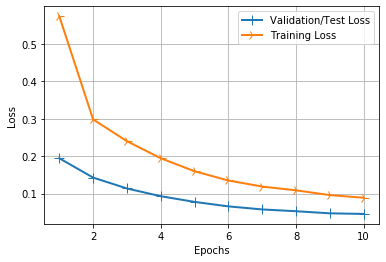

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

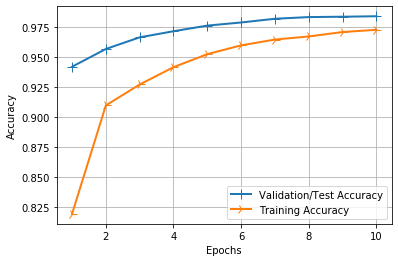

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

### Step 7A - Saving our Model

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [20]:
model.save("/content/drive/My Drive/DeepLearningCV/Trained Models/mnist_simple_cnn_10_epochs.h5")
print("Model save")

Model save


### Step 7B - Loading our Model

In [21]:
from keras.models import load_model
classifier = load_model("/content/drive/My Drive/DeepLearningCV/Trained Models/mnist_simple_cnn_10_epochs.h5")
print("Model loaded")

Model loaded


### Step 8 - Lets input some of our test data into our classifier

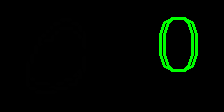

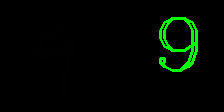

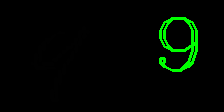

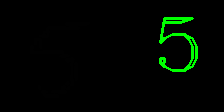

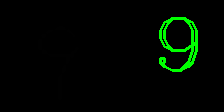

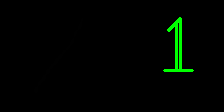

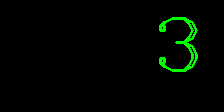

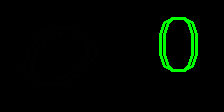

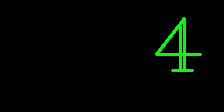

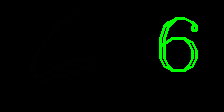

In [22]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

def draw_test(name, pred, input_im):
  BLACK = [0,0,0]
  expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0], cv2.BORDER_CONSTANT, value=BLACK)
  expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
  cv2.putText(expanded_image, str(pred), (152,70), cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,255,0), 2)
  cv2_imshow(expanded_image)

for i in range(0,10):
  rand = np.random.randint(0,len(X_test))
  input_im = X_test[rand]
  
  imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
  input_im = input_im.reshape(1,28,28,1)

  ## get prediction
  res = str(classifier.predict_classes(input_im,1,verbose=0)[0])

  draw_test("Prediction", res, imageL)
  cv2.waitKey(0)

cv2.destroyAllWindows()

### Putting All Together

**We don't need to run each section of code separately. Once we know it all works as it's supposed to, we can put all te pieces together and start training our model**


In [0]:
from keras.datasets import mnist
from keras.utils import np_utils
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD 

# Training Parameters
batch_size = 128
epochs = 10

# loads the MNIST dataset
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

# Getting our date in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our date thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# store the shape of a single image 
input_shape = (img_rows, img_cols, 1)

# change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Now we one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

# create model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'])

print(model.summary())

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

###Visualizing Our Model
- First let's re-create our model 


In [23]:
%matplotlib inline
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

input_shape = (28,28,1)
num_classes = 10

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)              

### Generating the diagram of the model architecture

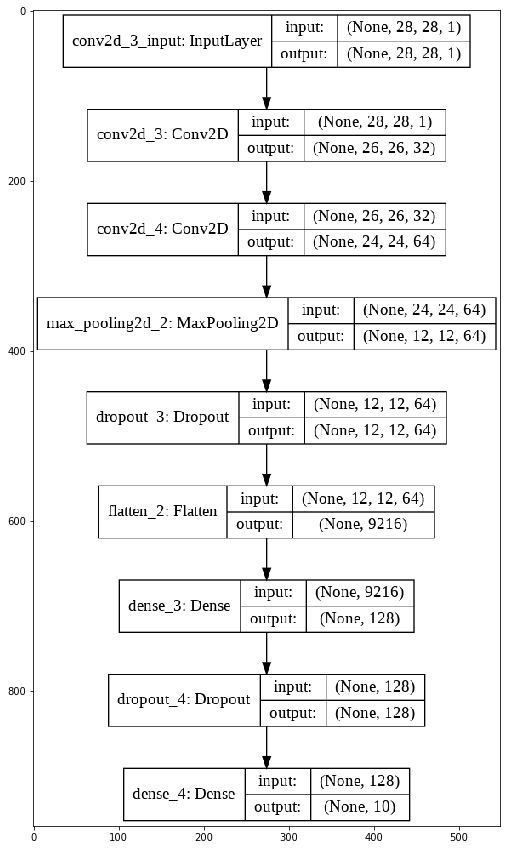

In [24]:
# Save our model diagrams to this path
model_diagrams_path = '/content/drive/My Drive/DeepLearningCV/Trained Models/'

# Generate the plot
plot_model(model, to_file = model_diagrams_path + 'model_plot.png',
           show_shapes = True,
           show_layer_names = True)

# Show the plot here
img = mpimg.imread(model_diagrams_path + 'model_plot.png')
plt.figure(figsize=(30,15))
imgplot = plt.imshow(img) 

Great thanks to professor Rajeev D. Ratan. Thanks to the course he taught on the Udemy platform, I was able to make this model.

Link of Course: https://www.udemy.com/share/101YkoA0ofdVlWRH4=/